In [35]:
%pip install -Uq matplotlib.pyplot
%pip install -Uq IPython.display
%pip install -Uq seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\Илья\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement IPython.display (from versions: none)
ERROR: No matching distribution found for IPython.display

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\Илья\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\Илья\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\Илья\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [36]:
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display
import seaborn as sns

In [37]:
gender = pd.read_csv('./gender_submission.csv')
train = pd.read_csv('./train (1).csv')
test = pd.read_csv('./test.csv')

In [38]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<Axes: xlabel='Sex', ylabel='count'>

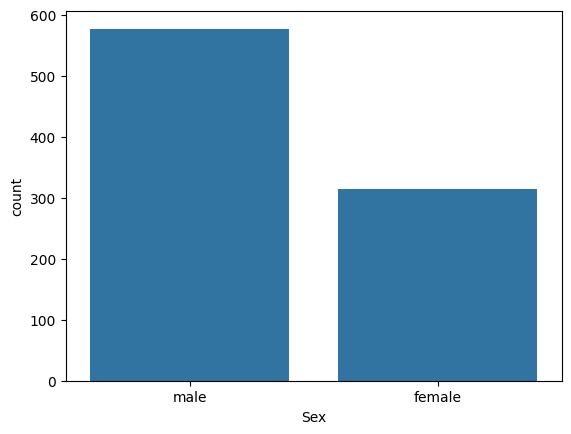

In [41]:
sns.countplot(x = "Sex", data = train)

<Axes: xlabel='Embarked', ylabel='count'>

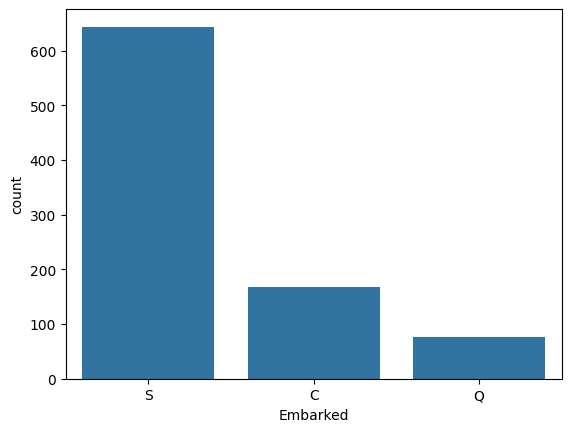

In [42]:
sns.countplot(x = "Embarked", data = train)

<Axes: xlabel='Pclass', ylabel='count'>

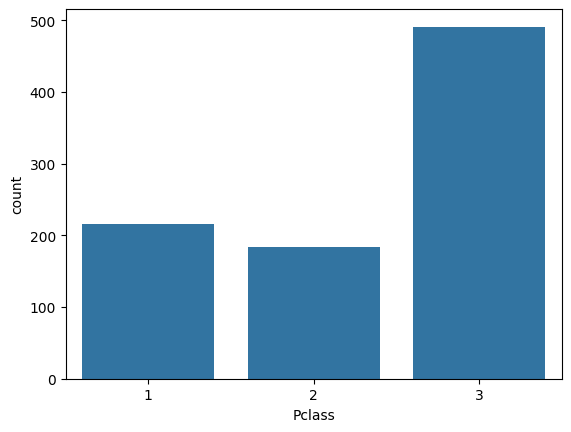

In [43]:
sns.countplot(x = "Pclass", data = train)

<Axes: xlabel='SibSp', ylabel='count'>

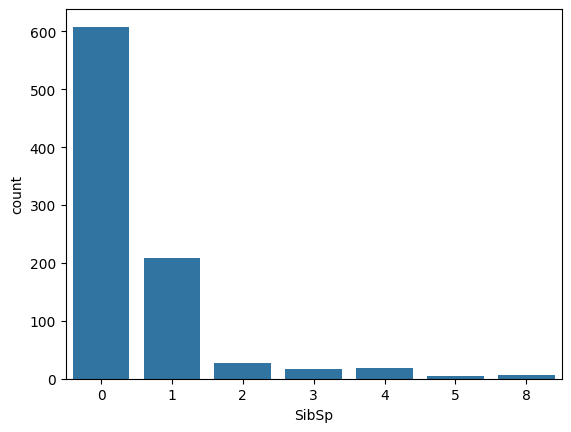

In [44]:
sns.countplot(x = "SibSp", data = train)

<Axes: xlabel='Sex'>

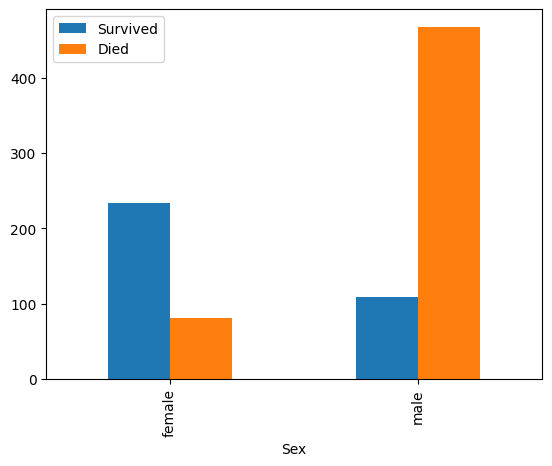

In [45]:
train['Died'] = 1 - train['Survived']
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind = 'bar')

In [46]:
X = train.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)
y = train['Survived']  # вектор меток "Survived"
X_encoded = pd.get_dummies(X)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [56]:
X_train.dropna(inplace=True)
y_train = y_train.drop(X_train.index)

KeyError: '[331, 733, 382, 704, 813, 118, 536, 361, 865, 595, 239, 721, 81, 259, 486, 716, 800, 781, 542, 326, 534, 535, 483, 762, 713, 390, 482, 377, 365, 412, 7, 580, 155, 880, 199, 424, 884, 247, 478, 305, 316, 2, 405, 742, 554, 829, 677, 380, 626, 302, 432, 404, 843, 355, 753, 212, 449, 79, 148, 60, 660, 804, 588, 765, 265, 133, 708, 544, 346, 821, 456, 500, 430, 445, 172, 450, 314, 332, 801, 90, 834, 581, 795, 69, 131, 597, 135, 164, 193, 869, 715, 525, 381, 173, 6, 685, 73, 882, 328, 453, 145, 234, 220, 370, 811, 132, 694, 864, 41, 108, 603, 56, 394, 706, 549, 24, 429, 434, 51, 526, 816, 569, 436, 693, 352, 18, 666, 582, 83, 61, 272, 285, 695, 746, 12, 182, 513, 628, 587, 523, 664, 841, 678, 163, 248, 570, 787, 74, 113, 635, 501, 104, 114, 92, 89, 336, 879, 817, 543, 548, 94, 11, 43, 329, 167, 779, 537, 735, 499, 178, 583, 784, 177, 644, 710, 615, 383, 257, 734, 551, 15, 3, 473, 393, 222, 506, 567, 530, 9, 249, 22, 356, 221, 874, 528, 340, 743, 519, 203, 237, 93, 730, 440, 559, 184, 791, 487, 153, 75, 631, 68, 188, 271, 662, 236, 88, 757, 117, 125, 731, 289, 238, 0, 881, 467, 827, 395, 278, 691, 116, 228, 622, 655, 516, 318, 606, 144, 634, 558, 809, 745, 369, 268, 623, 307, 423, 310, 349, 371, 479, 576, 261, 195, 890, 744, 866, 59, 658, 263, 100, 443, 687, 799, 640, 169, 179, 341, 57, 858, 149, 124, 703, 50, 353, 823, 142, 399, 575, 320, 707, 723, 407, 38, 175, 245, 764, 287, 750, 127, 322, 255, 770, 856, 190, 115, 737, 679, 638, 649, 616, 875, 807, 157, 665, 171, 16, 862, 749, 515, 617, 480, 283, 225, 848, 437, 844, 37, 857, 374, 469, 758, 651, 194, 503, 861, 741, 579, 162, 630, 152, 684, 675, 111, 226, 618, 103, 421, 419, 586, 119, 53, 151, 403, 207, 752, 717, 8, 722, 452, 253, 571, 636, 714, 262, 610, 297, 414, 150, 705, 789, 550, 488, 147, 146, 836, 870, 348, 463, 325, 123, 759, 608, 143, 851, 197, 609, 279, 293, 400, 122, 183, 202, 438, 246, 788, 129, 637, 402, 794, 689, 810, 219, 641, 812, 672, 624, 855, 386, 509, 267, 441, 496, 112, 232, 774, 607, 671, 373, 872, 751, 233, 806, 676, 317, 798, 258, 627, 632, 282, 376, 224, 728, 472, 505, 824, 803, 619, 761, 645, 754, 556, 850, 577, 85, 242, 698, 35, 540, 170, 654, 786, 755, 838, 574, 690, 460, 553, 780, 206, 392, 397, 756, 217, 4, 642, 797, 546, 725, 683, 98, 406, 200, 134, 27, 847, 230, 489, 378, 288, 418, 391, 592, 498, 138, 62, 471, 647, 867, 520, 14, 156, 40, 492, 379, 187, 763, 216, 52, 337, 748, 719, 724, 701, 251, 726, 461, 455, 887, 269, 161, 555, 729, 401, 702, 476, 771, 105, 565, 389, 1, 561, 80, 205, 34, 775, 508, 427, 366, 91, 339, 345, 13, 315, 600, 387, 273, 883, 646, 818, 484, 873, 504, 831, 243, 566, 562, 686, 189, 782, 699, 681, 510, 58, 474, 747, 252, 21, 313, 160, 276, 191, 385, 805, 491, 343, 769, 308, 661, 130, 663, 871, 99, 372, 458, 614, 20, 700, 71, 106, 860, 435, 102] not found in axis'

In [57]:
from sklearn.linear_model import LogisticRegression

# Создание модели
model = LogisticRegression()

# Обучение модели
model.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [572, 140]